In [1]:
import matplotlib
#matplotlib.use('TkAgg')
#from pylab import *
import networkx as nx
import random as rd
import random 

p_i = 0.04 # infection probability
p_r = 0.5 # recovery probability
n = 200
m = 0.1

def initialize():
    global g
    g = nx.gnm_random_graph(n, m)
    print(g)
    g.pos = nx.spring_layout(g)
    for i in range(len(g.nodes)):
        g.nodes[i]['state'] = 1 if random.uniform(0,1) < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    
def update(g, p_i, p_r):
  old_g = g.copy() # we update g and read from old_g
  for a in g.nodes:
    if old_g.nodes[a]['state'] == 0: # if susceptible
      for b in g.neighbors(a):
        if old_g.nodes[b]['state'] == 1: # if neighbor b is infected
          if rd.random() < p_i:
            g.nodes[a]['state'] = 1
            break
    else: # if infected
      g.nodes[a]['state'] = 0 if rd.random() < p_r else 1
        
#import pycxsimulator
#pycxsimulator.GUI().start(func=[initialize, observe, update])

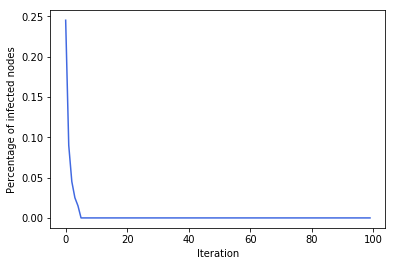

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#1st set of values
initialize()
states = []
for i in range(100):
    update(g, 0.04, 0.5)
    count=0
    for i in range(len(list(g.nodes))):
        count+=g.nodes[i]['state']
    states.append(count/n)
    
plt.plot(np.linspace(0,99,100), states, color='royalblue')
plt.ylabel('Percentage of infected nodes')
plt.xlabel('Iteration')
plt.show()

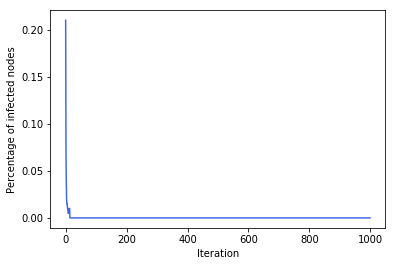

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#2nd set of values
initialize()
states = []
for i in range(1000):
    update(g, 0.5, 0.5)
    count=0
    for i in range(len(list(g.nodes))):
        count+=g.nodes[i]['state']
    states.append(count/n)
    
plt.plot(np.linspace(0,999,1000), states, color='royalblue')
plt.ylabel('Percentage of infected nodes')
plt.xlabel('Iteration')
plt.show()

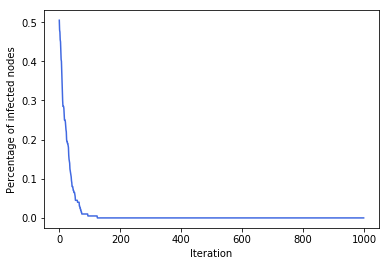

In [7]:
#3rd set of values
initialize()
states = []
for i in range(1000):
    update(g, 0.04, 0.04)
    count=0
    for i in range(len(list(g.nodes))):
        count+=g.nodes[i]['state']
    states.append(count/n)
    
plt.plot(np.linspace(0,999,1000), states, color='royalblue')
plt.ylabel('Percentage of infected nodes')
plt.xlabel('Iteration')
plt.show()

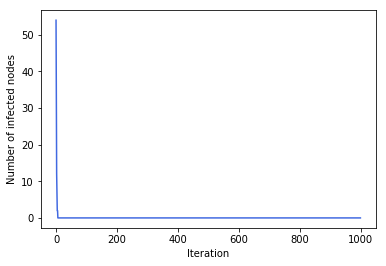

In [65]:
#4th set of values
initialize()
states = []
for i in range(1000):
    update()
    count=0
    for i in range(len(list(g.nodes))):
        count+=g.nodes[i]['state']
    states.append(count/n)
    
plt.plot(np.linspace(0,999,1000), states, color='royalblue')
plt.ylabel('Percentage of infected nodes')
plt.xlabel('Iteration')
plt.show()

In [32]:
import networkx as nx
import numpy as np
n=1000
m=20000
def initialize1():
    global g
    g = nx.gnm_random_graph(n, m)
    g.pos = nx.spring_layout(g)
    
def initialize2():
    global g
    g = nx.watts_strogatz_graph(n, 20, 0.1)
    g.pos = nx.spring_layout(g)
    
def initialize3():
    global g
    g = nx.barabasi_albert_graph(n, 20)
    g.pos = nx.spring_layout(g)


In [33]:
initialize()
degrees=[]
for i in list(g.nodes):
    degrees.append(g.degree(i))
print(np.mean(degrees))

initialize2()
degrees2=[]
for i in list(g.nodes):
    degrees2.append(g.degree(i))
print(np.mean(degrees2))

initialize3()
degrees3=[]
for i in list(g.nodes):
    degrees3.append(g.degree(i))
print(np.mean(degrees3))

40.0
20.0
39.2


In [34]:
initialize()
degrees=[]
for i in list(g.edges):
    degrees.append(g.degree(i[0]))
    degrees.append(g.degree(i[1]))
print(np.mean(degrees))

initialize2()
degrees2=[]
for i in list(g.edges):
    degrees2.append(g.degree(i[0]))
    degrees2.append(g.degree(i[1]))
print(np.mean(degrees2))
3
initialize3()
degrees3=[]
for i in list(g.edges):
    degrees3.append(g.degree(i[0]))
    degrees3.append(g.degree(i[1]))
print(np.mean(degrees3))

40.9538
20.1004
61.01107142857143


I really was not sure how too make all three types of graphs have the same average degree, so I simply chose arbitrary parameters. The point is, however, that for each one of them, the neighbours have a larger average degree which is explained by the 'your friends have more friends than you' phenomenon.